<a href="https://colab.research.google.com/github/MirvtMohamed/Sentiment_Analysis/blob/main/sentiment_analysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [19]:
# Load IMDB dataset
num_words = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences with increased max length
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [20]:
model = keras.Sequential([
    keras.layers.Embedding(input_dim=num_words, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
    Bidirectional(LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])



In [21]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [22]:
# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)



In [23]:
# Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), callbacks=[lr_scheduler])


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 638s 2s/step - accuracy: 0.7083 - loss: 0.5467 - val_accuracy: 0.7863 - val_loss: 0.4453 - learning_rate: 0.0010
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 653s 2s/step - accuracy: 0.8707 - loss: 0.3129 - val_accuracy: 0.8587 - val_loss: 0.3448 - learning_rate: 0.0010
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 682s 2s/step - accuracy: 0.9225 - loss: 0.2020 - val_accuracy: 0.8472 - val_loss: 0.3755 - learning_rate: 0.0010
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 650s 2s/step - accuracy: 0.9476 - loss: 0.1423 - val_accuracy: 0.8525 - val_loss: 0.4041 - learning_rate: 0.0010
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 681s 2s/step - accuracy: 0.9752 - loss: 0.0766 - val_accuracy: 0.8564 - val_loss: 0.4862 - learning_rate: 5.0000e-04


In [24]:
# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 186ms/step - accuracy: 0.8549 - loss: 0.4888
Test Accuracy: 0.8564


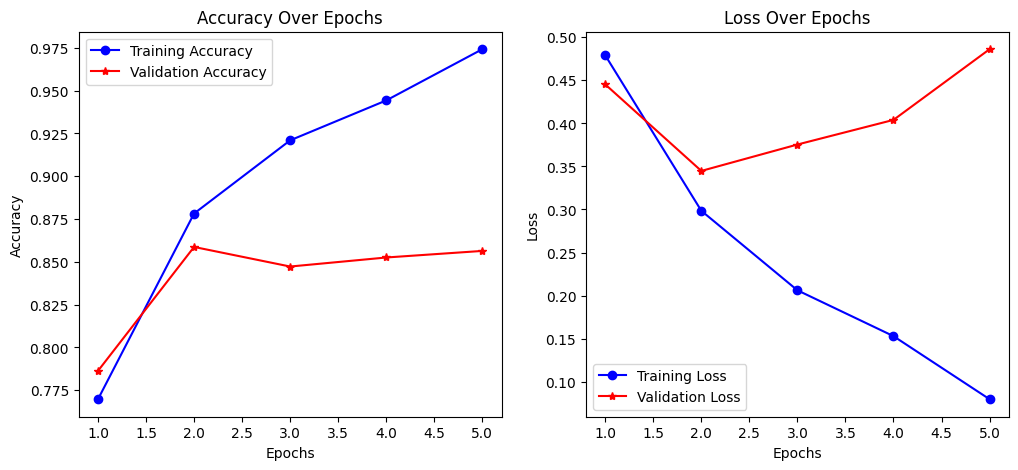

In [25]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 150s 188ms/step


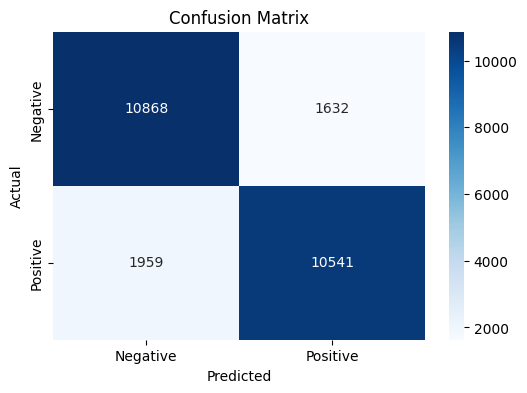

              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86     12500
    Positive       0.87      0.84      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Predict on test data
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
